# Chapter 0
Imports and preliminary work

In [1]:
# for the urls for our text importing
from bs4 import BeautifulSoup
import urllib.request

# we'll need this for the median function: 
import statistics

# and for graphing: 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# for looking at amiss words: 
from collections import Counter 

In [2]:
# here's some nlp imports and prelim work: 

# for the nlp, of course
import nltk
nltk.download('cmudict')
import re

from nltk.tokenize import word_tokenize 
from string import punctuation

# of course we'll make heavy use of this: 
mypunc = list(punctuation)
# and a unique constraint for this dataset: 
mypunc.append('--')

#print(mypunc)

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\NoahDiekemper\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


In [3]:
# some cred to this fellow for the initial get-go:
# https://stackoverflow.com/questions/25714531/find-rhyme-using-nltk-in-python

# preparatory: 
thedict = nltk.corpus.cmudict.dict()

In [4]:
# what counts as a rhyme depends on vowels
# we use this reference for cues: 
# https://www.nltk.org/_modules/nltk/corpus/reader/cmudict.html
# and otherwise hardcode this manually: 

myvowels = ['AA', 'AH', 'AW', 'AE', 'AO', 'AY', 
         'EH', 'EY', 'ER', # the ER is perhaps controversial 
          # but I am convinced that the words here encoded with it as a final phoneme
          # all rhyme
          # e.g. occur and sir
         'IH', 'IY', 'OW', 'OY', 'UH', 'UW']

In [5]:
# here we define our rhyme-testing function: 

def test_rhyme(word_a = 'move', word_b = 'love'):
    # let's return a playfully named bool 
    orange = 0

    # and this dictionary is case-sensitive so . . .
    word_a = word_a.lower()
    word_b = word_b.lower()
    
    # we try the first word
    try:
        syll_a = thedict[word_a]
    except KeyError:
        fix_a = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_a, word_a)
        print(fix_a)
        return word_a
    # we try the second word
    try:
        syll_b = thedict[word_b]
    except KeyError:
        fix_b = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_b, word_b)
        print(fix_b)
        return word_b
    
    # do they rhyme?
    for pron_a in syll_a:
        # english needs the final vowel sounds to match
        # for a word to rhyme
        # hence: 
        vowel = 0
        jk = 1
        # we search from the end of the word backwards
        # looking for the final vowel sound
        while (vowel == 0):
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) in myvowels:
                vowel = 1
            else:
                jk += 1

        # and now we carry on
        # looking for any homophonic ending that a and b share: 
        for pron_b in syll_b:
            presumptive = 1
            # and here we test each phoneme separately 
            # and set our sub-bool to false and break it if any one fails: 
            for i in range(jk):
                myindex = i + 1
                if (" ".join(re.findall("[a-zA-Z]+", pron_a[-myindex]))  != " ".join(re.findall("[a-zA-Z]+", pron_b[-myindex])) ):
                    presumptive = 0
                    break
            if presumptive == 1:
                orange = 1
                break
            
    # and we return our bool
    return orange

In [6]:
# test cases: expecting results 000 111 0 11

# don't rhyme these days: 
print(test_rhyme('love', 'move'))
print(test_rhyme('loved', 'moved'))
print(test_rhyme('loved', 'proved'))

# can still rhyme with the animal
print(test_rhyme('love', 'dove'))

# rhyme bc of their last sound only
print(test_rhyme('how', 'now'))
print(test_rhyme('now', 'cow'))

# don't
print(test_rhyme('brown', 'cow'))

# but do
print(test_rhyme('brown', 'crown'))
print(test_rhyme('free', 'legacy'))

0
0
0
1
1
1
0
1
1


# Chapter 1: Anomalies
In which we investigate how often sonnets' rhymes have broken due to changes in the English language, and what the distribution of intact/damaged sonnets is.

In [7]:
# we use a dict to tell our code
# which lines of a sonnet are meant to rhyme with which
sonnet_dict={}
sonnet_dict[0] = 2
sonnet_dict[1] = 3
sonnet_dict[4] = 6
sonnet_dict[5] = 7
sonnet_dict[8] = 10
sonnet_dict[9] = 11
sonnet_dict[12] = 13

In [8]:
# "sonnet" 126 is just a bunch (6) of rhyming couplets
# so we account for that here
dozen_dict = {}
dozen_dict[0] = 1
dozen_dict[2] = 3
dozen_dict[4] = 5
dozen_dict[6] = 7
dozen_dict[8] = 9
dozen_dict[10] = 11

In [9]:
# sonnet 99 is irregular
# so we take that into account here
nena_dict = {}
nena_dict[0] = 2
nena_dict[1] = 3
nena_dict[2] = 4
nena_dict[5] = 7
nena_dict[6] = 8
nena_dict[9] = 11
nena_dict[10] = 12
nena_dict[13] = 14

In [10]:
# here are the relics of obsolete entries 
# that weren't in NLTK's dictionary at all
# that I pseudo-manually updated
# with words that rhyme with them

# broken into multiple cells merely for readability

thedict['niggarding'] =      thedict['building']
thedict['renewest'] =        thedict['newest']
thedict['self-killed'] =     thedict['killed']
thedict['unprovident'] =     thedict['provident']
thedict['ruinate'] =         thedict['ate']
thedict['bestowest'] =       thedict['west']

In [11]:
thedict['convertest'] =      thedict['test']
thedict['untrimmd'] =        thedict['trimmed']
thedict['growest'] =         thedict['west']
thedict['amazeth'] =         thedict['death']
thedict['a-doting'] =        thedict['doting']
thedict['stelled'] =         thedict['felled']
thedict['toild'] =           thedict['toiled']
thedict['embassage'] =       thedict['ridge']
thedict['oer'] =             thedict['oar']
thedict['re-survey'] =       thedict['survey']
thedict['equipage'] =        thedict['page']
thedict['staineth'] =        thedict['death']
thedict['invocate'] =        thedict['mate']
thedict['deceivest'] =       thedict['vest']
thedict['refusest'] =        thedict['zest']
thedict['forbear'] =         thedict['bear']

In [12]:
thedict['unrespected'] =     thedict['respected']
thedict['recured'] =         thedict['recurred']
thedict['impanneled'] =      thedict['paneled']
thedict['uprear'] =          thedict['rear']
thedict['offence'] =         thedict['offense']
thedict['wilful-slow'] =     thedict['slow']
thedict['carcanet'] =        thedict['net']
thedict['allayd'] =          thedict['allayed']
thedict['nought'] =          thedict['ought']
thedict['cheque'] =          thedict['check']
thedict['crownd'] =          thedict['crowned']
thedict['oer-worn'] =        thedict['worn']
thedict['down-razed'] =      thedict['razed']
thedict['alack'] =           thedict['lack']
thedict['jollity'] =         thedict['quality']

In [13]:
thedict['strumpeted'] =      thedict['trumpeted']
thedict['impiety'] =         thedict['piety']
thedict['outworn'] =         thedict['worn']
thedict['crownd'] =          thedict['crowned']
thedict['anon'] =            thedict['on']
thedict['decayd'] =          thedict['decayed']
thedict['oer-read'] =        thedict['read']
thedict['oerlook'] =         thedict['look']
thedict['inhearse'] =        thedict['rehearse']
thedict['swerving'] =        thedict['serving']
thedict['attainted'] =       thedict['tainted']

In [14]:
thedict['offence'] =         thedict['offense']
thedict['after-loss'] =      thedict['loss']
thedict['wantonness'] =      thedict['dress']
thedict['deemd'] =           thedict['deemed']
thedict['intermixd'] =       thedict['intermixed']
thedict['esteeming'] =       thedict['teaming']
thedict['burnd'] =           thedict['burned']
thedict['dial-hand'] =       thedict['hand']
thedict['unbred'] =          thedict['bred']
thedict['wights'] =          thedict['nights']
thedict['prefiguring'] =     thedict['figuring']
thedict['staind'] =          thedict['stained']
thedict['renewd'] =          thedict['renewed']
thedict['greeing'] =         thedict['agreeing']

In [15]:
thedict['incertainty'] =     thedict['certainty']
thedict['meetness'] =        thedict['happiness']
thedict['tenderd'] =         thedict['tendered']
thedict['deemd'] =           thedict['deemed']
thedict['gatherd'] =         thedict['gathered']
thedict['honouring'] =       thedict['honoring']
thedict['savour'] =          thedict['savor']
thedict['growst'] =          thedict['most']
thedict['swayst'] =          thedict['waist']
thedict['gaol'] =            thedict['jail']
thedict['overplus'] =        thedict['plus']
thedict['fulfil'] =          thedict['fulfill']
thedict['reproving'] =       thedict['proving']
thedict['aright'] =          thedict['right']
thedict['new-fired'] =       thedict['fired']

In [16]:
thedict['viewest'] = thedict['west']
thedict['departest'] = thedict['test']
thedict['dimmd'] = thedict['dimmed']
thedict['owest'] = thedict['west']
thedict['gazeth'] = thedict['death']
thedict['foild'] = thedict['foiled']
thedict['vassalage'] = thedict['ledge']
thedict['disdaineth'] = thedict['death']
thedict['receivest'] = thedict['vest']
thedict['usest'] = thedict['zest']

In [17]:
thedict['esteemd'] = thedict['esteemed']
thedict['fixd'] = thedict['fixed']
thedict['turnd'] = thedict['turned']
thedict['reignd'] = thedict['reigned']
thedict['rememberd'] = thedict['remembered']
thedict['esteemd'] = thedict['esteemed']
thedict['unfatherd'] = thedict['bothered']
thedict['favour'] = thedict['favor']
thedict['showst'] = thedict['most']
thedict['playst'] = thedict['waist']

### Webscraping

In [18]:
# and here's the hard-coded part
# where we gather our sonnets

# first we collect all the links from a web reference page: 

sonnetlinks=[]
html_page = urllib.request.urlopen("http://shakespeare.mit.edu/Poetry/sonnets.html")
soup = BeautifulSoup(html_page, "html.parser")
for link in soup.findAll('a'):
    # and some particular scrubbing: 
    if 'amazon' not in link.get('href'):
        sonnetlinks.append('http://shakespeare.mit.edu/Poetry/' + link.get('href'))

In [19]:
# and here we actually grab the text of them: 

def get_sonnet_text(mylink):
    html_page = urllib.request.urlopen(mylink)
    soup = BeautifulSoup(html_page, "html.parser")
    foundit = soup.text
    #print(foundit)
    return foundit

sonnettexts = []
for x in sonnetlinks:
    sonnettexts.append(get_sonnet_text(x))

In [20]:
# we strike the empty lines 
# and also the 'Sonnet x' title headings
sonnets = []
for each_sonnet in sonnettexts:
    working_sonnet = each_sonnet.split('\n')
    ourlines = [x for x in working_sonnet if x != '']
    ourlines = [x for x in ourlines if 'sonnet' not in x.lower()]
    sonnets.append(ourlines)

In [21]:
# and here's the part where we turn our sonnets
# into lists of lines of separate words
sonnets_tokenized=[]
for sonnet in sonnets:
    sonnet_tokens = []
    for line in sonnet: 
        thisline = line.replace("'", "")
        tokens = [x for x in word_tokenize(thisline) if x not in mypunc]
        # this is only a band-aid
            # fixed more minutely above, 
            # with the new dictionary entries
        # but it addresses the most common issue with axing all single quotes in this text
        tokens = [x.replace("lld", "lled") for x in tokens]
        tokens = [x.replace("rrd", "rred") for x in tokens]
        tokens = [x.replace("ssd", "ssed") for x in tokens]
        tokens = [x.replace("rmd", "rmed") for x in tokens]
        #print(tokens)
        sonnet_tokens.append(tokens)
    sonnets_tokenized.append(sonnet_tokens)

In [22]:
# and we look for the pairs of lines
# that don't rhyme

anomalies=[]
sonnet_tallies = []
for i, sonnet in enumerate(sonnets_tokenized):
    
    sonnet_rhymes=[]

    # so we have 3 different cases 
    # literally bc of the 2 irregular poems here
    
    if len(sonnet) == 14:
        for index in list(sonnet_dict.keys()):
            word_a = sonnet[sonnet_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            # we note whether a pair rhymes or not
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                # and if not, append the info to the anomalies
                anomalies.append([i, index, sonnet_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    elif len(sonnet) == 12:
        for index in list(dozen_dict.keys()):
            word_a = sonnet[dozen_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                anomalies.append([i, index, dozen_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    elif len(sonnet) == 15:
        for index in list(nena_dict.keys()):
            word_a = sonnet[nena_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey = test_rhyme(word_a, word_b)
            sonnet_rhymes.append(dothey)
            if dothey == 0:
                anomalies.append([i, index, nena_dict[index], word_a, word_b])
        sonnet_tallies.append(sonnet_rhymes)
    else:
        print("Huh!!", i, sonnet)
#print(anomalies)
#print(sonnet_tallies)

In [23]:
# so we tally up the rhymes that still work . . .

accuracies = [sum(x)/len(x) for x in sonnet_tallies]
#print(accuracies)

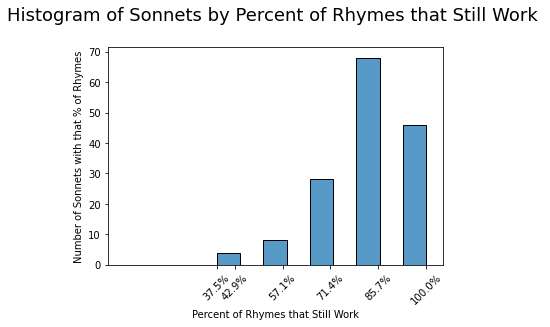

In [25]:
# and we graph them

ax = sns.histplot(accuracies)
ax.set_xlim(0.05, 1.05)
ax.set_title("Histogram of Sonnets by Percent of Rhymes that Still Work \n",
            fontsize=18)

ax.set_xlabel("Percent of Rhymes that Still Work")
ax.set_ylabel("Number of Sonnets with that % of Rhymes")
myxlabels=[str(round(x*100, 1))+'%' for x in list(set(accuracies))]
plt.xticks(ticks=list(set(accuracies)), labels=myxlabels, rotation=45)
plt.show()

In [26]:
%%time

# and which words in particular are giving us so much trouble?

justthewordsmaam = [x[-2:] for x in anomalies]
#print(justthewordsmaam)

words = [item for sublist in justthewordsmaam for item in sublist]
#print(words)

d = Counter(words)
#print(d)

sordidwords = sorted(d.items(), key=lambda pair: pair[1], reverse=True)
commonsordid = [x for x in sordidwords if x[1] > 1]
print(commonsordid)

[('love', 12), ('alone', 9), ('prove', 9), ('gone', 6), ('are', 6), ('one', 5), ('eye', 5), ('tongue', 5), ('come', 4), ('wrong', 4), ('moan', 4), ('spent', 4), ('argument', 4), ('memory', 3), ('bear', 3), ('tomb', 3), ('blood', 3), ('dead', 3), ('forth', 3), ('worth', 3), ('care', 3), ('is', 3), ('near', 3), ('where', 3), ('doom', 3), ('die', 2), ('was', 2), ('majesty', 2), ('age', 2), ('were', 2), ('counterfeit', 2), ('song', 2), ('buried', 2), ('night', 2), ('even', 2), ('heaven', 2), ('past', 2), ('invent', 2), ('desert', 2), ('amiss', 2), ('remedy', 2), ('approve', 2), ('appear', 2), ('dumb', 2), ('affords', 2), ('words', 2), ('good', 2), ('there', 2), ('fiend', 2)]
Wall time: 998 µs


In [27]:
# and here we ask for the normal sonnet indices 
# of the ones which are still intact
good_indices = [i+1 for i, x in enumerate(sonnet_tallies) if 0 not in x]
print("This many are still intact: ", len(good_indices))
print("Their indices are: ", good_indices)
# oh look, number 130.

This many are still intact:  46
Their indices are:  [9, 11, 20, 21, 22, 24, 40, 41, 43, 51, 57, 58, 65, 68, 69, 73, 77, 82, 87, 88, 92, 96, 98, 99, 104, 108, 111, 113, 114, 118, 119, 120, 122, 125, 126, 127, 128, 129, 130, 131, 134, 135, 141, 143, 148, 150]


# Chapter II: The Rhymes

In [28]:
# here we define a rhyme-sound-returning function: 
# it's possible we won't actually need this
# unless we want to streamline code for a different corollary

def rhyme_sound(word_a = 'move'):

    # and this dictionary is case-sensitive so . . .
    word_a = word_a.lower()
    
    # we try the first word
    try:
        syll_a = thedict[word_a]
    except KeyError:
        fix_a = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_a, word_a)
        print(fix_a)
        return word_a
    
    # and what sound is it?
    for pron_a in syll_a:
        # english needs the final vowel sounds to match
        # for a word to rhyme
        # hence: 
        vowel = 0
        jk = 1
        # we search from the end of the word backwards
        # looking for the final vowel sound
        finalsound = ""
        
        while (vowel == 0):
            finalsound = " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) + finalsound
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) in myvowels:
                vowel = 1
            else:
                jk += 1
                
        
        return finalsound

In [29]:
print(rhyme_sound('move'))
print(rhyme_sound('love'))
print(rhyme_sound('dove'))
print(rhyme_sound('of'))
print(rhyme_sound('smooth'))
print(rhyme_sound('behoove'))
print(rhyme_sound('read'))
print(rhyme_sound('lead'))
print(rhyme_sound('led'))
print(rhyme_sound('mead'))
print(rhyme_sound('said'))
print(rhyme_sound('seed'))

UWV
AHV
AHV
AHV
UWDH
UWV
EHD
EHD
EHD
IYD
EHD
IYD


In [30]:
# here we define our rhyme-testing function: 

def test_rhyme_sound(word_a = 'move', word_b = 'love'):
    # let's return a playfully named bool 
    orange = 0

    # and this dictionary is case-sensitive so . . .
    word_a = word_a.lower()
    word_b = word_b.lower()
    
    # we try the first word
    try:
        syll_a = thedict[word_a]
    except KeyError:
        fix_a = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_a, word_a)
        print(fix_a)
        return word_a
    # we try the second word
    try:
        syll_b = thedict[word_b]
    except KeyError:
        fix_b = 'thedict[\'%s\'] = thedict[\'%s\']' % (word_b, word_b)
        print(fix_b)
        return word_b
    
    # do they rhyme?
    for pron_a in syll_a:
        # english needs the final vowel sounds to match
        # for a word to rhyme
        # hence: 
        vowel = 0
        jk = 1
        # we search from the end of the word backwards
        # looking for the final vowel sound
        while (vowel == 0):
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-jk])) in myvowels:
                vowel = 1
            else:
                jk += 1
        # and now we carry on
        # looking for any homophonic ending that a and b share: 
        for pron_b in syll_b:
            presumptive = 1
            # and here we test each phoneme separately 
            # and set our sub-bool to false and break it if any one fails: 
            for i in range(jk):
                myindex = i + 1
                if (" ".join(re.findall("[a-zA-Z]+", pron_a[-myindex]))  != " ".join(re.findall("[a-zA-Z]+", pron_b[-myindex])) ):
                    presumptive = 0
                    break                   
            if presumptive == 1:
                orange = 1
                finalsound = ""
                vowel = 0
                mn = 1
                while (vowel == 0):
                    finalsound = " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) + finalsound
                    if " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) in myvowels:
                        vowel = 1
                    else:
                        mn += 1
                break
    if orange == 0:
        finalsound = ""
        vowel = 0
        mn = 1
        while (vowel == 0):
            finalsound = " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) + finalsound
            if " ".join(re.findall("[a-zA-Z]+", pron_a[-mn])) in myvowels:
                vowel = 1
            else:
                mn += 1
    # and we return our bool and our sound
    return orange, finalsound

In [31]:
# some test cases

print(test_rhyme_sound('lead', 'read'))
print(test_rhyme_sound('lead', 'bed'))
print(test_rhyme_sound('mead', 'read'))

(1, 'IYD')
(1, 'EHD')
(1, 'IYD')


In [32]:
# some more test cases 

dothey, thesound = test_rhyme_sound('lead', 'read')
print(dothey)
print(thesound)

1
IYD


In [33]:
rhymingtuples=[]

for i, sonnet in enumerate(sonnets_tokenized):
    
    #sonnet_rhymes=[]
    
    if len(sonnet) == 14:
        for index in list(sonnet_dict.keys()):
            word_a = sonnet[sonnet_dict[index]][-1]
            word_b = sonnet[index][-1]
            
            dothey, thesound = test_rhyme_sound(word_a, word_b)
            rhymingtuples.append([dothey, thesound, word_a, word_b])
    elif len(sonnet) == 12:
        for index in list(dozen_dict.keys()):

            word_a = sonnet[dozen_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey, thesound = test_rhyme_sound(word_a, word_b)
            rhymingtuples.append([dothey, thesound, word_a, word_b])

    elif len(sonnet) == 15:
        for index in list(nena_dict.keys()):

            word_a = sonnet[nena_dict[index]][-1]
            word_b = sonnet[index][-1]
            dothey, thesound = test_rhyme_sound(word_a, word_b)
            rhymingtuples.append([dothey, thesound, word_a, word_b])
    else:
        print("Huh!!", i, sonnet)
        

In [34]:
rhymingtuples[:5]

[[1, 'IYS', 'decease', 'increase'],
 [0, 'IY', 'memory', 'die'],
 [1, 'AYZ', 'lies', 'eyes'],
 [1, 'UWL', 'cruel', 'fuel'],
 [0, 'EHNT', 'content', 'ornament']]

In [35]:
rhymingsounds = [x[1] for x in rhymingtuples]
rhymingsounds[:5]

['IYS', 'IY', 'AYZ', 'UWL', 'EHNT']

In [37]:
rhymesoundsfreq = Counter(rhymingsounds)
rhymesoundsfreq

Counter({'IYS': 5,
         'IY': 98,
         'AYZ': 14,
         'UWL': 2,
         'EHNT': 10,
         'IHNG': 24,
         'AW': 11,
         'EHLD': 2,
         'EYZ': 10,
         'UWZ': 7,
         'AYN': 10,
         'OWLD': 11,
         'AHST': 4,
         'ER': 32,
         'UWM': 8,
         'AYM': 14,
         'EHND': 15,
         'IHV': 7,
         'AON': 3,
         'IYV': 3,
         'EYM': 9,
         'EHL': 12,
         'EHR': 23,
         'EHFT': 1,
         'AOZ': 4,
         'IYT': 4,
         'EYS': 13,
         'IHLD': 1,
         'AHN': 18,
         'AART': 21,
         'AYT': 39,
         'IHL': 22,
         'IHJH': 2,
         'AAR': 2,
         'EY': 34,
         'OY': 1,
         'AWNDZ': 2,
         'AY': 13,
         'AYF': 5,
         'IYP': 4,
         'AYND': 16,
         'IHT': 8,
         'IHTS': 3,
         'AHNT': 3,
         'EYT': 20,
         'UWV': 8,
         'EHST': 20,
         'AOR': 13,
         'IHSH': 1,
         'IYVZ': 1,
         'IHRD

In [38]:
sorted(rhymesoundsfreq.items(), key=lambda pair: pair[1], reverse=True)

[('IY', 98),
 ('AYT', 39),
 ('EY', 34),
 ('ER', 32),
 ('OW', 28),
 ('UW', 25),
 ('IHNG', 24),
 ('EHR', 23),
 ('IHL', 22),
 ('AART', 21),
 ('EYT', 20),
 ('EHST', 20),
 ('AYD', 19),
 ('AHN', 18),
 ('OWN', 17),
 ('AYND', 16),
 ('EHND', 15),
 ('AYZ', 14),
 ('AYM', 14),
 ('EYN', 14),
 ('EYS', 13),
 ('AY', 13),
 ('AOR', 13),
 ('EHL', 12),
 ('AW', 11),
 ('OWLD', 11),
 ('EHNT', 10),
 ('EYZ', 10),
 ('AYN', 10),
 ('EYM', 9),
 ('EHD', 9),
 ('IHR', 9),
 ('UWM', 8),
 ('IHT', 8),
 ('UWV', 8),
 ('AONG', 8),
 ('IHD', 8),
 ('UWZ', 7),
 ('IHV', 7),
 ('EYK', 7),
 ('EHNS', 7),
 ('OWZ', 7),
 ('EHN', 7),
 ('EYD', 7),
 ('ERS', 7),
 ('IYN', 7),
 ('AEND', 7),
 ('IHZ', 6),
 ('EYJH', 6),
 ('IYD', 6),
 ('EYST', 6),
 ('AHV', 6),
 ('IYDZ', 6),
 ('UWTH', 6),
 ('IYS', 5),
 ('AYF', 5),
 ('EHKT', 5),
 ('AOT', 5),
 ('AORT', 5),
 ('AOL', 5),
 ('UHK', 5),
 ('AHS', 5),
 ('AWND', 5),
 ('AORN', 5),
 ('AAT', 5),
 ('ERD', 5),
 ('AHST', 4),
 ('AOZ', 4),
 ('IYT', 4),
 ('IYP', 4),
 ('IHN', 4),
 ('IYF', 4),
 ('AOS', 4),
 ('IHS', 4

In [39]:
# how many different/unique rhyming sounds appear?

len(rhymesoundsfreq.items())

194

In [40]:
# what is the median number of times
# that a rhyming sound gets used?

all_tallies = [x[1] for x in rhymesoundsfreq.items()]
statistics.median(all_tallies)

2.0

In [43]:
# so which sounds are the most common? 

common_sounds = rhymesoundsfreq.most_common(20)
common_sounds[:10]

[('IY', 98),
 ('AYT', 39),
 ('EY', 34),
 ('ER', 32),
 ('OW', 28),
 ('UW', 25),
 ('IHNG', 24),
 ('EHR', 23),
 ('IHL', 22),
 ('AART', 21)]

In [44]:
# we separate the halves of our list of tuples
# for easy use in a plot

cs_labels = [x[0] for x in common_sounds]
cs_tallies = [x[1] for x in common_sounds]
print(cs_labels)
print(cs_tallies)

['IY', 'AYT', 'EY', 'ER', 'OW', 'UW', 'IHNG', 'EHR', 'IHL', 'AART', 'EYT', 'EHST', 'AYD', 'AHN', 'OWN', 'AYND', 'EHND', 'AYZ', 'AYM', 'EYN']
[98, 39, 34, 32, 28, 25, 24, 23, 22, 21, 20, 20, 19, 18, 17, 16, 15, 14, 14, 14]


In [45]:
print(sum([x[1] for x in rhymesoundsfreq.items()]))
print("And we expect approximately ", 7*154)

1079
And we expect approximately  1078


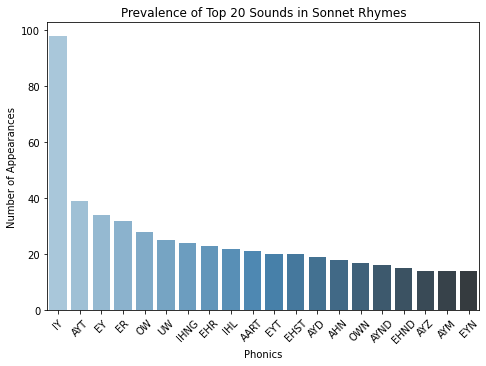

<Figure size 1200x1000 with 0 Axes>

In [46]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(cs_labels,cs_tallies)
plt.xticks(rotation=45)

ax = sns.barplot(y= cs_tallies, x = cs_labels, palette=("Blues_d"))

# set the labels
ax.set_title('Prevalence of Top 20 Sounds in Sonnet Rhymes')
ax.set_ylabel('Number of Appearances')
ax.set_xlabel('Phonics')

figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

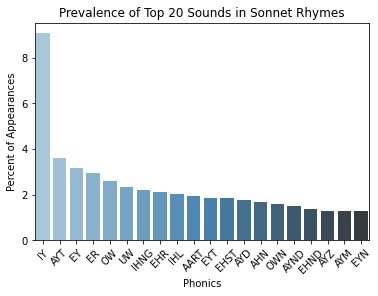

<Figure size 1200x1000 with 0 Axes>

In [47]:
fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])

ax.bar(cs_labels,cs_tallies)
plt.xticks(rotation=45)
cs_percentz = [100*x/len(rhymingtuples) for x in cs_tallies]
ax = sns.barplot(y = cs_percentz, x = cs_labels, palette=("Blues_d"))

# set the labels
ax.set_title('Prevalence of Top 20 Sounds in Sonnet Rhymes')
ax.set_ylabel('Percent of Appearances')
ax.set_xlabel('Phonics')

figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

# Chapter III: Word Frequencies

In [49]:
all_sounds = [x[0] for x in rhymesoundsfreq.items()]
all_sounds[:5]

['IYS', 'IY', 'AYZ', 'UWL', 'EHNT']

In [50]:
the_lines = [line for sonnet in sonnets_tokenized for line in sonnet]
the_lines[:5]

[['FROM', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['That', 'thereby', 'beautys', 'rose', 'might', 'never', 'die'],
 ['But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['His', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes']]

In [51]:
rhymed_words = [x[-1] for x in the_lines]
rhymed_words[:5]

['increase', 'die', 'decease', 'memory', 'eyes']

In [52]:
all_words = [word for line in the_lines for word in line]
all_words[:5]

['FROM', 'fairest', 'creatures', 'we', 'desire']

In [53]:
unrhymed_words = [x[:-1] for x in the_lines]
unrhymed_words = [word for line in unrhymed_words for word in line]
unrhymed_words[:5]

['FROM', 'fairest', 'creatures', 'we', 'desire']

In [55]:
# we lower-case everything
rhymed_words = [x.lower() for x in rhymed_words]
unrhymed_words = [x.lower() for x in unrhymed_words]
all_words = [x.lower() for x in all_words]

In [103]:
# stop words, of course
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')) )
stop_words += ['thee', 'thou', 'thine', 'mine', 'shall', 'doth']

In [104]:
clean_tokens = [tok for tok in all_words if len(tok.lower())>1 and (tok.lower() not in stop_words)]
print(len(all_words))
print(len(clean_tokens))

17525
8894


In [105]:
clean_rhymes = [tok for tok in rhymed_words if len(tok.lower())>1 and (tok.lower() not in stop_words)]
print(len(rhymed_words))
print(len(clean_rhymes))

2156
1892


In [106]:
clean_unrhymes = [tok for tok in unrhymed_words if len(tok.lower())>1 and (tok.lower() not in stop_words)]
print(len(unrhymed_words))
print(len(clean_unrhymes))

15369
7002


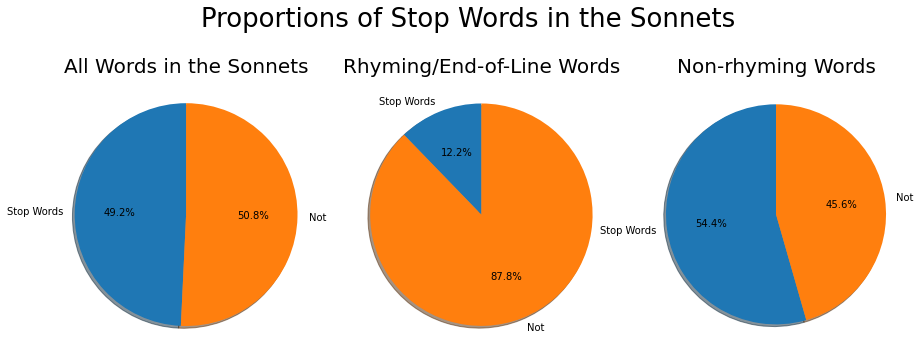

In [107]:
import matplotlib.pyplot as plt
alla = len(all_words)
allb = len(clean_tokens)
allc = alla-allb
rhma = len(rhymed_words)
rhmb = len(clean_rhymes)
rhmc = rhma - rhmb
nona = len(unrhymed_words)
nonb = len(clean_unrhymes)
nonc = nona-nonb

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Stop Words', 'Not'
sizes = [allc, allb]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

#fig, (ax1, ax2, ax3) = plt.subplot(1, 2, 3)

fig, axs = plt.subplots(1, 3,figsize=(15,5))
fig.suptitle('Proportions of Stop Words in the Sonnets', size = 26, y=1.08)
#fig.suptitle('Horizontally stacked subplots')

#fig1, ax1 = plt.subplots()
axs[0].pie(sizes, 
        #explode=explode, 
        labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

labels = 'Stop Words', 'Not'
sizes = [rhmc, rhmb]
axs[1].pie(sizes, 
        #explode=explode, 
        labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

labels = 'Stop Words', 'Not'
sizes = [nonc, nonb]
axs[2].pie(sizes, 
        #explode=explode, 
        labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[2].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

axs[0].set_title('All Words in the Sonnets',size=20)
axs[1].set_title('Rhyming/End-of-Line Words',size=20)
axs[2].set_title('Non-rhyming Words',size=20)

#axs[0].title.set_text('All Words in the Sonnets')
#axs[1].title.set_text('Rhyming/End-of-Line Words')
#axs[2].title.set_text('Non-rhyming Words')

plt.show()

In [115]:
# OOH let's do a box and whiskers plot
sonnets_tokenized[:5]
words_by_sonnet = [line for poem in sonnets_tokenized for line in poem]
words_by_sonnet[:5]

[['FROM', 'fairest', 'creatures', 'we', 'desire', 'increase'],
 ['That', 'thereby', 'beautys', 'rose', 'might', 'never', 'die'],
 ['But', 'as', 'the', 'riper', 'should', 'by', 'time', 'decease'],
 ['His', 'tender', 'heir', 'might', 'bear', 'his', 'memory'],
 ['But', 'thou', 'contracted', 'to', 'thine', 'own', 'bright', 'eyes']]

In [119]:
sonnet_words = []
for each in sonnets_tokenized:
    poem = []
    for line in each:
        poem.extend([x for x in line])
    sonnet_words.append(poem)
sonnet_words[:2]

[['FROM',
  'fairest',
  'creatures',
  'we',
  'desire',
  'increase',
  'That',
  'thereby',
  'beautys',
  'rose',
  'might',
  'never',
  'die',
  'But',
  'as',
  'the',
  'riper',
  'should',
  'by',
  'time',
  'decease',
  'His',
  'tender',
  'heir',
  'might',
  'bear',
  'his',
  'memory',
  'But',
  'thou',
  'contracted',
  'to',
  'thine',
  'own',
  'bright',
  'eyes',
  'Feedst',
  'thy',
  'lightst',
  'flame',
  'with',
  'self-substantial',
  'fuel',
  'Making',
  'a',
  'famine',
  'where',
  'abundance',
  'lies',
  'Thyself',
  'thy',
  'foe',
  'to',
  'thy',
  'sweet',
  'self',
  'too',
  'cruel',
  'Thou',
  'that',
  'art',
  'now',
  'the',
  'worlds',
  'fresh',
  'ornament',
  'And',
  'only',
  'herald',
  'to',
  'the',
  'gaudy',
  'spring',
  'Within',
  'thine',
  'own',
  'bud',
  'buriest',
  'thy',
  'content',
  'And',
  'tender',
  'churl',
  'makest',
  'waste',
  'in',
  'niggarding',
  'Pity',
  'the',
  'world',
  'or',
  'else',
  'this',
  

In [120]:
sonnet_counts = [len(x) for x in sonnet_words]
sonnet_counts[:20]

[105,
 114,
 115,
 101,
 104,
 108,
 100,
 110,
 117,
 112,
 116,
 118,
 108,
 112,
 111,
 108,
 124,
 114,
 115,
 113]

In [121]:
nonstop_counts = []
for i, poem in enumerate(sonnet_words):
    nonstop_tokens = [tok for tok in poem if len(tok.lower())>1 and (tok.lower() not in stop_words)]
    thiscount = len(nonstop_tokens) / sonnet_counts[i]
    nonstop_counts.append(thiscount)
nonstop_counts[:20]

[0.6,
 0.5701754385964912,
 0.4782608695652174,
 0.594059405940594,
 0.5384615384615384,
 0.5462962962962963,
 0.6,
 0.5727272727272728,
 0.5470085470085471,
 0.5178571428571429,
 0.5344827586206896,
 0.559322033898305,
 0.4444444444444444,
 0.4732142857142857,
 0.5225225225225225,
 0.5555555555555556,
 0.5,
 0.5350877192982456,
 0.591304347826087,
 0.5575221238938053]

(0.0, 1.0)

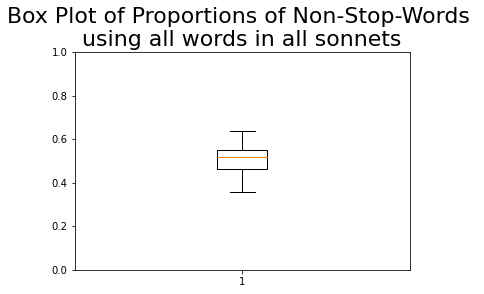

In [131]:
import numpy as np
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Proportions of Non-Stop-Words \nusing all words in all sonnets', size = 22)
ax1.boxplot(nonstop_counts)
plt.ylim([0,1])

(0.0, 40.0)

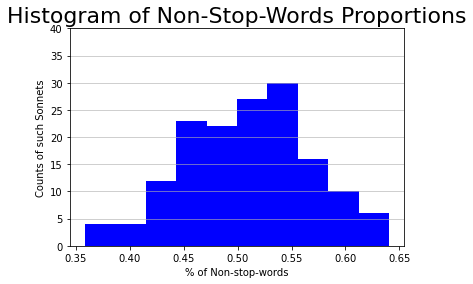

In [137]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=nonstop_counts, bins='auto', color='blue')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('% of Non-stop-words')
plt.ylabel('Counts of such Sonnets')
plt.title('Histogram of Non-Stop-Words Proportions', size = 22)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [142]:
separated_rhyme_words = []
for each in sonnets_tokenized:
    poem = []
    for line in each:
        poem.append(line[-1])
    separated_rhyme_words.append(poem)
separated_rhyme_words[:10]

[['increase',
  'die',
  'decease',
  'memory',
  'eyes',
  'fuel',
  'lies',
  'cruel',
  'ornament',
  'spring',
  'content',
  'niggarding',
  'be',
  'thee'],
 ['brow',
  'field',
  'now',
  'held',
  'lies',
  'days',
  'eyes',
  'praise',
  'use',
  'mine',
  'excuse',
  'thine',
  'old',
  'cold'],
 ['viewest',
  'another',
  'renewest',
  'mother',
  'womb',
  'husbandry',
  'tomb',
  'posterity',
  'thee',
  'prime',
  'see',
  'time',
  'be',
  'thee'],
 ['spend',
  'legacy',
  'lend',
  'free',
  'abuse',
  'give',
  'use',
  'live',
  'alone',
  'deceive',
  'gone',
  'leave',
  'thee',
  'be'],
 ['frame',
  'dwell',
  'same',
  'excel',
  'on',
  'there',
  'gone',
  'where',
  'left',
  'glass',
  'bereft',
  'was',
  'meet',
  'sweet'],
 ['deface',
  'distilled',
  'place',
  'self-killed',
  'usury',
  'loan',
  'thee',
  'one',
  'art',
  'thee',
  'depart',
  'posterity',
  'fair',
  'heir'],
 ['light',
  'eye',
  'sight',
  'majesty',
  'hill',
  'age',
  'still',
  

In [143]:
rhyme_counts = [len(x) for x in separated_rhyme_words]
# and this is predictably boring: 
rhyme_counts[:20]

[14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14]

In [161]:
rhyme_nonstop_counts = []
for i, poem in enumerate(separated_rhyme_words):
    xx = [tok for tok in poem if len(tok.lower())>1 and (tok.lower() not in stop_words)]
    thiscount = (len(xx) / rhyme_counts[i])
    rhyme_nonstop_counts.append(thiscount)

[0.8571428571428571]
[0.8571428571428571, 0.7857142857142857]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571, 0.6428571428571429]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 0.9285714285714286]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 0.9285714285714286, 1.0]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 0.9285714285714286, 1.0, 0.8571428571428571]
[0.8571428571428571, 0.7857142857142857, 0.7857142857142857, 0.8571428571428571, 0.6428571428571429, 0.8571428571428571, 

(0.0, 1.0)

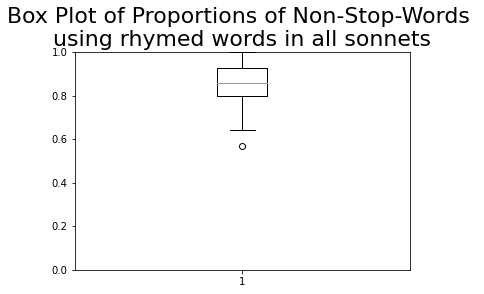

In [163]:

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Proportions of Non-Stop-Words \nusing rhymed words in all sonnets', size = 22)
ax1.boxplot(rhyme_nonstop_counts)
plt.ylim([0,1])

(0.0, 50.0)

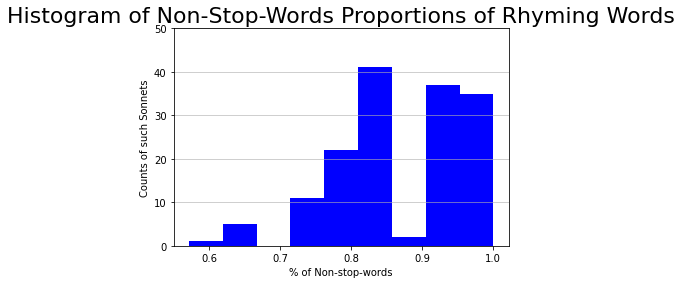

In [164]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=rhyme_nonstop_counts, bins='auto', color='blue')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('% of Non-stop-words')
plt.ylabel('Counts of such Sonnets')
plt.title('Histogram of Non-Stop-Words Proportions of Rhyming Words', size = 22)
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [166]:
from pylab import plot, show, savefig, xlim, figure, hold, ylim, legend, boxplot, setp, axes

# function for setting the colors of the box plots pairs
def setBoxColors(bp):
    setp(bp['boxes'][0], color='blue')
    setp(bp['caps'][0], color='blue')
    setp(bp['caps'][1], color='blue')
    setp(bp['whiskers'][0], color='blue')
    setp(bp['whiskers'][1], color='blue')
    setp(bp['fliers'][0], color='blue')
    setp(bp['fliers'][1], color='blue')
    setp(bp['medians'][0], color='blue')

    setp(bp['boxes'][1], color='red')
    setp(bp['caps'][2], color='red')
    setp(bp['caps'][3], color='red')
    setp(bp['whiskers'][2], color='red')
    setp(bp['whiskers'][3], color='red')
    setp(bp['fliers'][2], color='red')
    setp(bp['fliers'][3], color='red')
    setp(bp['medians'][1], color='red')

# Some fake data to plot
A= [[1, 2, 5,],  [7, 2]]
B = [[5, 7, 2, 2, 5], [7, 2, 5]]
C = [[3,2,5,7], [6, 7, 3]]

fig = figure()
ax = axes()
hold(True)

# first boxplot pair
bp = boxplot(A, positions = [1, 2], widths = 0.6)
setBoxColors(bp)

# second boxplot pair
bp = boxplot(B, positions = [4, 5], widths = 0.6)
setBoxColors(bp)

# thrid boxplot pair
bp = boxplot(C, positions = [7, 8], widths = 0.6)
setBoxColors(bp)

# set axes limits and labels
xlim(0,9)
ylim(0,9)
ax.set_xticklabels(['A', 'B', 'C'])
ax.set_xticks([1.5, 4.5, 7.5])

# draw temporary red and blue lines and use them to create a legend
hB, = plot([1,1],'b-')
hR, = plot([1,1],'r-')
legend((hB, hR),('Apples', 'Oranges'))
hB.set_visible(False)
hR.set_visible(False)

savefig('boxcompare.png')
show()

ImportError: cannot import name 'hold' from 'pylab' (C:\Users\NoahDiekemper\Anaconda3\lib\site-packages\pylab.py)

In [109]:
countall = Counter(all_words)
sorted(countall.items(), key=lambda pair: pair[1], reverse=True)[:20]

[('and', 489),
 ('the', 444),
 ('to', 409),
 ('of', 371),
 ('my', 364),
 ('i', 344),
 ('in', 323),
 ('that', 320),
 ('thy', 266),
 ('thou', 235),
 ('with', 181),
 ('not', 177),
 ('for', 171),
 ('is', 169),
 ('but', 164),
 ('me', 164),
 ('a', 163),
 ('thee', 162),
 ('love', 162),
 ('so', 145)]

In [110]:
countclean = Counter(clean_tokens)
sorted(countclean.items(), key=lambda pair: pair[1], reverse=True)[:20]

[('thy', 266),
 ('love', 162),
 ('eyes', 55),
 ('sweet', 55),
 ('time', 53),
 ('beauty', 52),
 ('art', 51),
 ('yet', 50),
 ('heart', 50),
 ('fair', 43),
 ('make', 43),
 ('one', 43),
 ('hath', 43),
 ('still', 41),
 ('eye', 38),
 ('true', 37),
 ('see', 35),
 ('loves', 35),
 ('like', 34),
 ('though', 33)]

In [111]:
countallrhymes = Counter(rhymed_words)
sorted(countallrhymes.items(), key=lambda pair: pair[1], reverse=True)[:20]

[('thee', 48),
 ('me', 33),
 ('be', 22),
 ('heart', 17),
 ('sight', 16),
 ('eyes', 14),
 ('time', 14),
 ('love', 14),
 ('alone', 12),
 ('away', 12),
 ('night', 12),
 ('you', 12),
 ('still', 11),
 ('day', 11),
 ('so', 11),
 ('part', 11),
 ('days', 10),
 ('art', 10),
 ('will', 10),
 ('state', 10)]

In [112]:
countrhymes = Counter(clean_rhymes)
sorted(countrhymes.items(), key=lambda pair: pair[1], reverse=True)[:20]

[('heart', 17),
 ('sight', 16),
 ('eyes', 14),
 ('time', 14),
 ('love', 14),
 ('alone', 12),
 ('away', 12),
 ('night', 12),
 ('still', 11),
 ('day', 11),
 ('part', 11),
 ('days', 10),
 ('art', 10),
 ('state', 10),
 ('lie', 10),
 ('show', 10),
 ('see', 9),
 ('mind', 9),
 ('prove', 9),
 ('decay', 9)]

In [113]:
countallunrhymes = Counter(unrhymed_words)
sorted(countallunrhymes.items(), key=lambda pair: pair[1], reverse=True)[:20]

[('and', 489),
 ('the', 444),
 ('to', 409),
 ('of', 371),
 ('my', 364),
 ('i', 342),
 ('in', 323),
 ('that', 320),
 ('thy', 266),
 ('thou', 235),
 ('with', 181),
 ('not', 173),
 ('for', 171),
 ('but', 164),
 ('is', 164),
 ('a', 163),
 ('love', 148),
 ('so', 134),
 ('me', 131),
 ('as', 121)]

In [72]:
countunrhymes = Counter(clean_unrhymes)
sorted(countunrhymes.items(), key=lambda pair: pair[1], reverse=True)[:20]

[('thy', 266),
 ('thou', 235),
 ('love', 148),
 ('thee', 114),
 ('doth', 88),
 ('shall', 59),
 ('mine', 55),
 ('sweet', 52),
 ('beauty', 52),
 ('yet', 50),
 ('hath', 43),
 ('art', 41),
 ('eyes', 41),
 ('time', 39),
 ('make', 39),
 ('thine', 37),
 ('fair', 37),
 ('one', 36),
 ('loves', 35),
 ('like', 34)]

In [66]:
from collections import defaultdict 
# Function to return a default 
# values for keys that is not 
# present 
def def_value(): 
    return ("NADA", 0)

In [ ]:
# now we want the most common words for each rhyming sound

all_sounds = [x[0] for x in rhymesoundsfreq.items()]
all_sounds

In [ ]:
common_rhyme_sounds['hello']

In [ ]:
common_rhyme_sounds = defaultdict(def_value) 

for each in countallrhymes.items():
    if each[1] > common_rhyme_sounds[each[0]][1]:
        common_rhyme_sounds[each[0]] = each
    elif each[1] == common_rhyme_sounds[each[0]][1]:
        print("There is a tie at ", each, " and ", common_rhyme_sounds[each[0]])

In [ ]:
for each in common_rhyme_sounds.keys():
    print(common_rhyme_sounds[each])

In [ ]:
for word in rhymed_words:
    

In [ ]:
rhymesoundsfreq.items()

In [ ]:
rhymesoundsfreq.items()

In [ ]:
rhymingtuples

In [ ]:
# so let's just look at the words: 
rhymedpairs = [x[2:] for x in rhymingtuples]
# and let's consider all the words together,
# how often they appear: 
rhymedwords = [t for sublist in rhymedpairs for t in sublist]
rhymedwords

In [ ]:
wordsfreq = Counter(rhymedwords)
wordsfreq

In [ ]:
sortedwordsfreq = sorted(wordsfreq.items(), key=lambda pair: pair[1], reverse=True)

In [ ]:
sortedwordsfreq = [x for x in sortedwordsfreq if x[1] > 9]
sortedwordsfreq

In [ ]:
swf_labels = [x[0] for x in sortedwordsfreq]
swf_tallies = [x[1] for x in sortedwordsfreq]
print(swf_labels)
print(swf_tallies)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(swf_labels,swf_tallies)
plt.xticks(rotation=45)

ax = sns.barplot(y= swf_tallies, x = swf_labels, palette=("Blues_d"))

# set the labels
ax.set_title('Prevalence of Top Words Ending Lines')
ax.set_ylabel('Number of Appearances')
ax.set_xlabel('Words')

figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

In [ ]:
# let's grab the commonest examples from all the sounds: 
rhymingtuples
thephonics = [x[1] for x in rhymingtuples]
uniquephonics = list(set(thephonics))
uniquephonics

In [ ]:
wordinstances = []
for sound in uniquephonics:
    # for now, our method is to include both words if they rhyme
    # if they do not, we just take the first word, 
        # since it's the sound we've recorded
        # regardless of whether it or the second sound is the changed one
        # and we ignore the second one altogether
        # one solution could be to expand rhyming typles
        # so that they contain separate sounds
        # from the function just returning both sounds and a bool
        # altogether
    relevant = [x[2] for x in rhymingtuples if x[1] == sound]
    relevant_b = [x[3] for x in rhymingtuples if ((x[1] == sound) & (x[0]==1))]
    relevant.extend(relevant_b)
    wordinstances.append([sound, relevant])

In [ ]:
wordinstances

In [ ]:
wordinstancecounter = [(x[0], Counter(x[1])) for x in wordinstances]
wordinstancecounter

In [ ]:
wordinstancecounter[0][1].most_common(1)

In [ ]:
phonicsexamples = [(x[0], x[1].most_common(1)[0][0]) for x in wordinstancecounter]
phonicsexamples

In [ ]:
phonic_example_dict=dict() 

for phonic, example in phonicsexamples: 
    phonic_example_dict[phonic] = example
print(phonic_example_dict) 

In [ ]:
new_cs_labels = [phonic_example_dict[x] for x in cs_labels]
new_cs_labels

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(new_cs_labels,cs_tallies)
plt.xticks(rotation=45)

ax = sns.barplot(y= cs_tallies, x = new_cs_labels, palette=("Blues_d"))

# set the labels
ax.set_title('Prevalence of Top 20 Sounds in Sonnet Rhymes')
ax.set_ylabel('Number of Appearances')
ax.set_xlabel('The Most Common Word of that Rhyming Group')

figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

In [ ]:
N = len(new_cs_labels)

plt.xticks(range(N), rotation=45)

ax = sns.barplot(y= cs_tallies, x = new_cs_labels, palette=("Blues_d"))

ax.plot(figsize=(20,10))

#plt.xticks() # add loads of ticks
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = .1 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, 2*plt.gcf().get_size_inches()[1])

# set the labels
ax.set_title('Prevalence of Top 20 Sounds in Sonnet Rhymes', fontsize=30)
ax.set_ylabel('Number of Appearances', fontsize=30)
ax.set_xlabel('The Most Common Word of that Rhyming Group', fontsize=30)

plt.show()

In [ ]:
countallrhymes = Counter(rhymed_words)
sorted(countallrhymes.items(), key=lambda pair: pair[1], reverse=True)

In [ ]:
allrhymeslist = sorted(countallrhymes.items(), key=lambda pair: pair[1], reverse=True)
toptwentywords = [x[0] for x in allrhymeslist][:20]
toptwentycounts = [x[1] for x in allrhymeslist][:20]

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(toptwentywords,toptwentycounts)
plt.xticks(rotation=45)

ax = sns.barplot(y= toptwentycounts, x = toptwentywords, palette=("Blues_d"))

# set the labels
ax.set_title('Prevalence of Top 20 Words Rhymed in the Sonnets', fontsize=15)
ax.set_ylabel('Number of Appearances', fontsize=15)
#ax.set_xlabel('The Most Common Word of that Rhyming Group', fontsize=30)

figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')

plt.show()

In [ ]:
N = len(toptwentywords)

plt.xticks(range(N), rotation=45)

ax = sns.barplot(y= toptwentycounts, x = toptwentywords, palette=("Blues_d"))

ax.plot(figsize=(20,10))

#plt.xticks() # add loads of ticks
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = .1 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, 2*plt.gcf().get_size_inches()[1])

# set the labels
ax.set_title('Prevalence of Top 20 Words Rhymed in the Sonnets', fontsize=30)
ax.set_ylabel('Number of Appearances', fontsize=30)
#ax.set_xlabel('The Most Common Word of that Rhyming Group', fontsize=30)

plt.show()